Rand Index 0.7302382722834697
0.7514854021988339
0.7581756800057786
0.7649861514489816
Rand Index 0.9038742317748124
0.8983263672602775
0.8996935451597475
0.9010648908640206


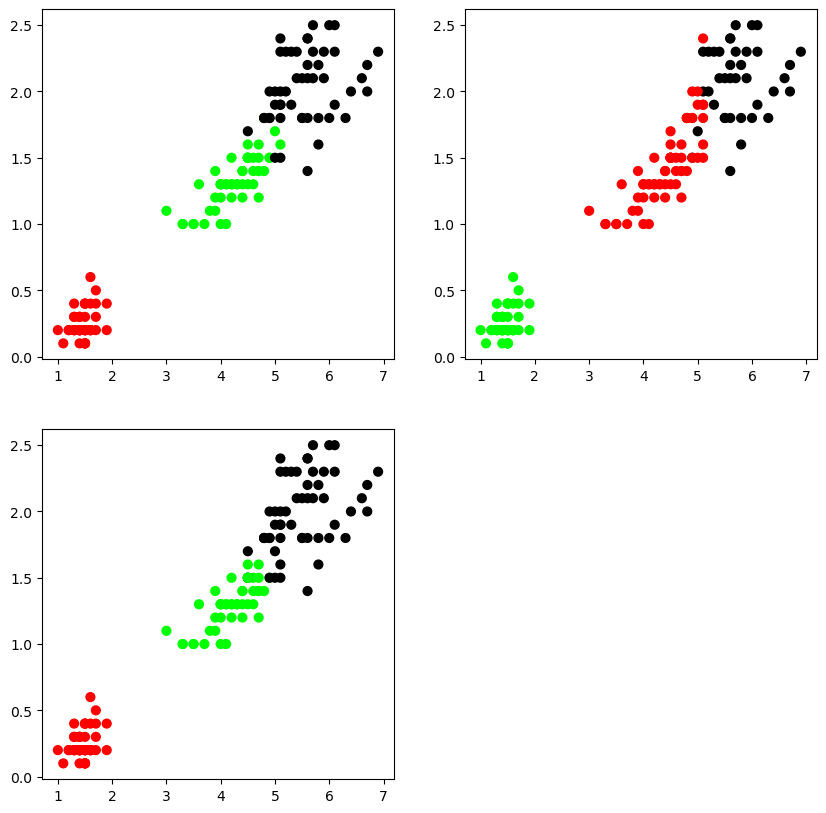

In [39]:
#KMeans Algo
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
import sklearn.metrics as sm
import pandas as pd
import numpy as np

dataset=pd.read_csv("iris.csv")
dataset['Targets']=dataset.Class.map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
X=dataset[['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']]
y=dataset[['Targets']]

model=KMeans(n_clusters=3)
model.fit(X)

scalar=preprocessing.StandardScaler()
scalar.fit(X)

xs=scalar.transform(X)

gmm=GaussianMixture(n_components=3)
gmm.fit(xs)
ypred=gmm.predict(xs)

plt.figure(figsize=(10,10))
colormap=np.array(['red','lime','black'])
plt.subplot(2,2,1)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y.Targets],s=40)

plt.subplot(2,2,2)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[model.labels_],s=40)

plt.subplot(2,2,3)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[ypred],s=40)

print("Rand Index",sm.adjusted_rand_score(y.Targets,model.labels_))
print(sm.homogeneity_score(y.Targets,model.labels_))
print(sm.v_measure_score(y.Targets,model.labels_))
print(sm.completeness_score(y.Targets,model.labels_))

print("Rand Index",sm.adjusted_rand_score(y.Targets,ypred))
print(sm.homogeneity_score(y.Targets,ypred))
print(sm.v_measure_score(y.Targets,ypred))
print(sm.completeness_score(y.Targets,ypred))
